In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import scipy.spatial
seaborn.set()
print('¡Bibliotecas Cargadas!')

¡Bibliotecas Cargadas!


In [3]:
df = pd.read_csv("oasis_cross-sectional.csv")
df.head(500)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


Mostramos nuestro Dataset, con ello podremos visualizar las variables, la clase, y el tipo de dato al cual pertenecen.



*   **ID:** Identificación del sujeto
*   **M/F:** Sexo del paciente
*   **Hand:** Mano dominante
*   **Age:** Edad del paciente
*   **EDUC:** Almacena años de educación,
      * 1 secundaria incompleta;
      * 2 secundaria completa;
      * 3 universidad incompleta;
      * 4 universidad completa;
      * 5 post-grado;
      
*   **SES:** Estatus Socioeconomico, clasificado en 1 (mejor estatus) a 5 (peor estatus)
*   **MMSE:** Mini examen del estado mental, que mide funciones cognitivas, se almacenan puntajes del 0 (peor) al 30 (Mejor), menores a 24 se consideran anormal.
*   **CDR:** Calificación de demencia clínica, evalua el grado de deterioro cognitivo (Clase)
      * 0: Sin demencia;
      * 0,5: Demencia muy leve;
      * 1: Demencia leve;
      * 2: Demencia moderada;

*   **eTIV:** Volumen intracraneal total estimado, relacionado con el volumen que ocupa el cerebro
*   **nWBV:** Volumen total del cerebro normalizado
* **ASF:** Factor de escala Atlas, proporciona una solución automatizada al problema ampliamente 
      encontrado de corregir la variación del tamaño de la cabeza en los análisis morfométricos regionales y de todo el cerebro, 
      siempre que se utilice un atlas objetivo apropiado para la edad y la población.
* **Delay:** Almacena la cantidad de días entre sesiones de MRI.

In [4]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


Creamos unas estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

# Balanceado
## Limpieza de datos
Como se muestra a continuación existe una gran cantidad de filas o muestras cuyos datos se encuentran ausente, lo primero que haremos es eliminar esas muestras debido a que unicamente provocaran torpeza en el estudio.
### Columnas y filas innecesarias 
Borramos todas las filas con valores indefinidos o nulos.

In [5]:
print(df.isna().sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [6]:
df = df.rename(columns={'M/F':'Sex'})
df.dropna(subset=['Educ'],inplace=True)
df.drop(columns=['ID','Hand','SES'], axis = 1, inplace=True)

Mientras se limpiaba los datos innecesarios, se nos presento la columna socioeconomic status por sus siglas "SES", la cuál tiene una carga de valor importante, esta podria relacionar habitos propios de una clase economica a la prediccion de demencia (habitos alimenticios, trabajo fisico, carga de estres, entre otros), pero, al momento de analisar dicha columna nos encontramos que carece de datos, es decir, muchas de sus filas estan vacias, por lo cuál desarrollando una solucion, se opto por inhabilitar esta columna, ya que el dejarla significaria que por el metodo de trabajo realizado de borrar toda fila con datos faltanta, una muestra demasiado pequeña.

Esta carga de valor se le transfirio a la columna Education, dicha esta nos presenta un panorama similar, dabido a que dependiendo del nivel educacional podriamos crear un paralelismo con el nivel socioeconomico.

In [7]:
df.dropna(axis=1,inplace=True)
df = df.fillna("", inplace=False)

for i, row in df.iterrows():
  if df.loc[i,'Sex']=='F':
    df.loc[i,'Sex']=0
  else:
    df.loc[i,'Sex']=1

df=df[['CDR','Sex','Age','Educ','MMSE','eTIV','nWBV','ASF']]
print(df.isna().sum())
df.head(300)

CDR     0
Sex     0
Age     0
Educ    0
MMSE    0
eTIV    0
nWBV    0
ASF     0
dtype: int64


,CDR,Sex,Age,Educ,MMSE,eTIV,nWBV,ASF
0,0.0,0,74,2.0,29.0,1344,0.743,1.306
1,0.0,0,55,4.0,29.0,1147,0.810,1.531
2,0.5,0,73,4.0,27.0,1454,0.708,1.207
8,0.0,1,74,5.0,30.0,1636,0.689,1.073
9,0.0,0,52,3.0,30.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...
411,0.5,0,70,1.0,29.0,1295,0.748,1.355
412,0.5,0,73,3.0,23.0,1536,0.730,1.142
413,0.0,0,61,2.0,28.0,1354,0.825,1.297
414,0.0,1,61,5.0,30.0,1637,0.780,1.072


Ahora que hemos eliminado cualquier vacio que podria estropear nuestro estudio, debemos seguir con el siguiente paso.

## Balanceo
Ya creado una Dataframe sin variables vacias, nos encontramos con otro gran problema, el des-balanceo, esto debido a la clase seleccionada: 

**CDR**, como se menciono anteriormente esta variable es la clasificacion de demencia clinica, y su importacia radica en la ponderacion del puntaje dado para cada paciente, que va desde 0, hasta 2, para el resultado de este estudio se le asignara la "clase" de este Dataframe.

Examinando el resultado entregado por el punto anterior podemos observar que existe una gran desproporción del CDR como se muestra a continuación:

,CDR,count
0,0.0,135
1,0.5,70
2,1.0,28
3,2.0,2


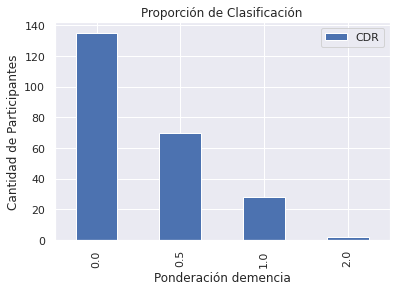

In [8]:
df.CDR.groupby(df.CDR).count().plot(kind='bar', legend='Reverse')
plt.ylabel('Cantidad de Participantes')
plt.xlabel('Ponderación demencia')
plt.title('Proporción de Clasificación')
df.groupby(['CDR']).size().reset_index(name = 'count')

La primera solución cuenta aquellos que obtuvieron 0, es decir, sin demencia, hasta 0.5, demencia muy leve, y por otro, aquellos que presentaron indices de demencia leve o moderada.

Pero al momento de presentarse esta solución se volvia a generar una desproporcion debido a que la condicion de agrupamiento generaba un grupo (Sin demencia, demencia muy leve) de una cantidad de 205, mientras que el otro grupo (demencia leve, moderada) un total de 30,  esta respuesta planteada no satisface el principio del balanceo, por lo que se propuso cambiar levemente la condición de agrupamiento:

Aquellos sin demencia formaran parte del primer grupo y aquellos que muestren rastros de demencia ya sea leve hasta moderada formaran parte del otro grupo.


In [9]:
for i, row in df.iterrows():
  if df.loc[i,'CDR']==0.0:
    df.loc[i,'CDR']=int(0)
  else:
    df.loc[i,'CDR']=int(1)

df['CDR'] = df['CDR'].apply(np.int64)
df.groupby(['CDR']).size().reset_index(name = 'count')

,CDR,count
0,0,135
1,1,100


Con la presente solucion evitamos crear un set de datos demaciado pequeño 

,CDR,Count
0,0,100
1,1,100


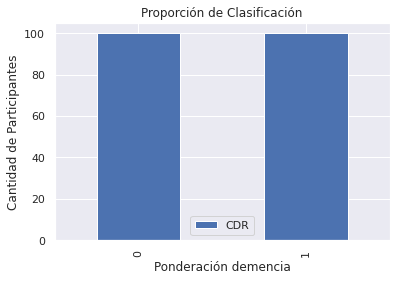

In [10]:
count = df["CDR"].value_counts()
for i, row in count.items():
  if row > 100:
    indices = df[df["CDR"]== i].sample(n=(row - 100), random_state=1).index
    df = df.drop(labels=indices, axis=0)

df.CDR.groupby(df.CDR).count().plot(kind='bar', legend='Reverse')
plt.ylabel('Cantidad de Participantes')
plt.xlabel('Ponderación demencia')
plt.title('Proporción de Clasificación')
df.groupby(['CDR']).size().reset_index(name = 'Count')

In [11]:
print(df)

     CDR Sex  Age  Educ  MMSE  eTIV   nWBV    ASF
0      0   0   74   2.0  29.0  1344  0.743  1.306
1      0   0   55   4.0  29.0  1147  0.810  1.531
2      1   0   73   4.0  27.0  1454  0.708  1.207
8      0   1   74   5.0  30.0  1636  0.689  1.073
9      0   0   52   3.0  30.0  1321  0.827  1.329
..   ...  ..  ...   ...   ...   ...    ...    ...
410    1   1   75   1.0  22.0  1656  0.762  1.060
411    1   0   70   1.0  29.0  1295  0.748  1.355
412    1   0   73   3.0  23.0  1536  0.730  1.142
414    0   1   61   5.0  30.0  1637  0.780  1.072
415    0   0   62   3.0  26.0  1372  0.766  1.279

[200 rows x 8 columns]


# Normalizado 
Este paso fundamental nos ayudara a evitar cualquier tipo de anomalía, redundancia y borrado que pudiera haber en el diseño de tablas y en la relación entre la información.


In [12]:
for i in df.columns:
  if i != "CDR":
    std = df[i].std()
    # media = df[i].mean()
    norm = (df[i]-df[i].mean())/std
    df[i] = norm

print(df)

     CDR       Sex       Age      Educ      MMSE      eTIV      nWBV       ASF
0      0 -0.707983  0.074460 -0.858312  0.589811 -0.682718 -0.060316  0.645622
1      0 -0.707983 -1.580198  0.667576  0.589811 -1.875159  1.375278  2.327999
2      1 -0.707983 -0.012628  0.667576  0.073565 -0.016888 -0.810254 -0.094624
8      0    1.4054  0.074460  1.430521  0.847934  1.084758 -1.217363 -1.096574
9      0 -0.707983 -1.841460 -0.095368  0.847934 -0.821937  1.739533  0.817598
..   ...       ...       ...       ...       ...       ...       ...       ...
410    1    1.4054  0.161547 -1.621257 -1.217050  1.205818  0.346792 -1.193778
411    1 -0.707983 -0.273889 -1.621257  0.589811 -0.979315  0.046818  1.012006
412    1 -0.707983 -0.012628 -0.095368 -0.958927  0.479458 -0.338865 -0.580644
414    0    1.4054 -1.057675  1.430521  0.847934  1.090811  0.732475 -1.104051
415    0 -0.707983 -0.970587 -0.095368 -0.184558 -0.513234  0.432500  0.443736

[200 rows x 8 columns]


# Creacion EXCEL procesado primera parte

In [13]:
df.to_excel('df01.xlsx')

# Validación cruzada
## K-Fold Cross Validation
* La Validación Cruzada o k-fold Cross Validation consiste en tomar los datos originales y  crear a partir de ellos dos conjuntos separados: un primer conjunto de entrenamiento (y prueba), y un segundo conjunto de validación.

* Su importancia radica en la calidad de las mediciones que deseamos obtener, ya que sin este metodo, nuestro modelo simplemente repetiría las etiquetas de las muestras que acaba de ver,  tendría una puntuación perfecta, pero no podría predecir nada útil todavía, es decir, tendria un sobreajuste.

**Es por que deseamo evaluar la precisión en la predicción y su error**.



In [14]:
def foldk(data, i, k):
    n = len(data)
    return data[n*(i-1)//k:n*i//k]


folds = {}
for i in range(0,5):
    test = foldk(df.sample(frac=1, random_state=1), i+1, 5)
    train = df.drop(labels=test.index, axis=0)
    folds[i] = {'entrenamiento': train, 'prueba': test}

In [15]:
folds[0]["prueba"]

,CDR,Sex,Age,Educ,MMSE,eTIV,nWBV,ASF
120,0,1.4054,-0.448064,-0.095368,-0.184558,-0.077418,0.925316,-0.027329
70,0,-0.707983,0.858245,-0.095368,0.847934,-0.737195,-0.553132,0.705439
64,0,1.4054,-3.496118,0.667576,0.847934,1.526627,0.818182,-1.440526
224,1,1.4054,1.467856,-0.858312,-1.475173,-0.906679,-1.217363,0.914802
389,1,1.4054,-0.186802,0.667576,-2.507665,0.636836,-1.260216,-0.722712
414,0,1.4054,-1.057675,1.430521,0.847934,1.090811,0.732475,-1.104051
212,1,-0.707983,0.335721,-1.621257,-1.733296,-0.489022,-0.960241,0.413827
9,0,-0.707983,-1.841460,-0.095368,0.847934,-0.821937,1.739533,0.817598
55,1,1.4054,0.509896,0.667576,0.589811,0.648942,-0.253157,-0.730189
342,0,-0.707983,-1.318936,-0.858312,0.847934,-0.234796,1.610973,0.137170


# Creación EXCEL procesado segunda parte

In [16]:
writer = pd.ExcelWriter('df02.xlsx')
for i in range(0,5):
  folds[i]["prueba"].to_excel(writer, sheet_name=("test"+str(i+1)))
  folds[i]["entrenamiento"].to_excel(writer, sheet_name="train"+str(i+1))

writer.save()
writer.close()

# K-Nearest-Neighbor
Escencialmente sirve para poder clasificar valores encontrando los puntos más cercanos, es decir, consiste en estimar el valor de un dato desconocido a partir de las características de los datos más próximos.

La medida de distancia para la realización de este algoritmo es la euclidiana simple, en la cual ocuparemos el metodo euclidian de la libreria scipy, ya que si bien se puede realizar por medio de un metodo "manual", este es irrelevante y solo gastariamos tiempo en el por eso el uso de esta libreria.

In [17]:
def disteuclidiana(test, train):
    del test['CDR'] #Se borra temporalmente la columna elegida como clase tanto en test como en train
    del train['CDR']
    return  scipy.spatial.distance.euclidean(train, test)

definimos una funcion la cual con nuestros datos de testeo y entrenamiento rellena las columnas de un diccionario temporal, y se va agregando al un dataframe vacio.

In [18]:
def kvecinos(test, train, newdict, k):
    newdict = pd.DataFrame()
    
    d = {}
    for j in range(len(test)):
        aux = pd.DataFrame()
        for q in range(len(train)):
            distancia = disteuclidiana(test.iloc[j], train.iloc[q])
            d['Distancia'] = distancia
            d['Index_test'] = test.index[j]
            d['Index_train'] = train.index[q]
            d['CDR_test'] = test.loc[test.index[j], 'CDR']
            d['CDR_train'] = train.loc[train.index[q], 'CDR']  
            aux = aux.append(d, ignore_index=True)
        aux = aux.sort_values('Distancia')
        newdict = newdict.append(aux[0:k], ignore_index=True) 

    return newdict

Se define k como valor base 3, esto para que el usuario pueda cambiar el valor de k a 3, 5 o 7 y los siguientes algoritmos se ajusten a ese cambio

In [76]:
split = {}
k = int(input("Ingrese k vecinos más cercanos")) #Ingresar la cantidad de vecinos mas cercanos.
for i in range(0, 5):
    print("Iniciando split número: ",i+1)
    if k == 3 or k == 5 or k == 7:
        split[i] = {}
        split[i] = kvecinos(folds[i]["prueba"], folds[i]["entrenamiento"], split[i], k)
    else: 
        print("Valor no aceptado")
        break


Iniciando split número:  1
Iniciando split número:  2
Iniciando split número:  3
Iniciando split número:  4
Iniciando split número:  5


In [73]:
print(k)

4


Se genera el excel con los valores correspondientes a las k distancias más cercanas

In [20]:
writer = pd.ExcelWriter('df03.xlsx')
for i in range(0,5):
  split[i].to_excel(writer, sheet_name=("Split"+str(i+1)))

writer.save()
writer.close()

Dentro de la funcion predicción, y por medio de "sub conjuntos", leeremos el dataframe distancias y por if podremos rellenar correctamente la clase predicha.

In [21]:
def prediccion(distancias, largoaux):
    aux = pd.DataFrame()
    data = pd.DataFrame()
    d = {}
    count0 = 0
    count1 = 0
    for i in range(0,40):
        min = largoaux*i
        max = largoaux*(i+1)
        aux = distancias[min:max].reset_index()
        for j in range(0, k):
            if aux.loc[aux.index[j], 'CDR_train'] == 1.0:
                count1+=1
            else: 
                count0+=1
        if count1 > count0:
            d['CDR_predictorio'] = 1
        else:
            d['CDR_predictorio'] = 0 
        
        d['CDR_test'] = aux.loc[aux.index[0], 'CDR_test']
        d['Index_test']= aux.loc[aux.index[0], 'Index_test']
        count0 = 0
        count1 = 0
        data = data.append(d, ignore_index=True)
    return data


In [22]:
comparacion = {}
for i in range(0, 5):
    comparacion[i] = {}
    comparacion[i] = prediccion(split[i], k)

In [23]:
comparacion[0]

,CDR_predictorio,CDR_test,Index_test
0,1.0,0.0,120.0
1,0.0,0.0,70.0
2,0.0,0.0,64.0
3,1.0,1.0,224.0
4,1.0,1.0,389.0
5,0.0,0.0,414.0
6,1.0,1.0,212.0
7,0.0,0.0,9.0
8,1.0,1.0,55.0
9,0.0,0.0,342.0


In [24]:
writer = pd.ExcelWriter('df04.xlsx')
for i in range(0,5):
  comparacion[i].to_excel(writer, sheet_name=("Split"+str(i+1)))

writer.save()
writer.close()

Por ultimo aqui establecemos por medio de if la cantidad de exitos y fracaso al momento de predecir, para luego rellenar un nuevo con un nuevo conjunto de datos un dataframe

In [58]:
prob = {}
data= pd.DataFrame()
list = []
sum = 0
for i in range(0,5):
  exito = 0
  fracaso = 0 
  for j in range(0, 40):
      if comparacion[i].loc[comparacion[i].index[j], 'CDR_test'] == comparacion[i].loc[comparacion[i].index[j], 'CDR_predictorio']:
        exito = exito+1
      else: 
        fracaso=fracaso+1
  
  prob['Exito'] = exito
  prob['Fracasos'] = fracaso
  prob['Acierto Local'] = (exito*100)/(exito+fracaso)
  list.append(prob['Acierto Local'])
  sum = sum + prob['Acierto Local']
  prob['Acierto Global']=sum/5
  prob['Desviacion Estandar'] = np.std(list)
  data = data.append(prob, ignore_index=True)




In [55]:
data

,Exito,Fracasos,Acierto Local,Acierto Global,Desviacion Estandar
0,32.0,8.0,80.0,16.0,0.000000
1,29.0,11.0,72.5,30.5,3.750000
2,30.0,10.0,75.0,45.5,3.118048
3,32.0,8.0,80.0,61.5,3.247595
4,25.0,15.0,62.5,74.0,6.442049


In [77]:
data.to_excel('df05.xlsx')